<a href="https://colab.research.google.com/github/jgumtau/datascience15/blob/main/SQL_1_Chinook_project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook


## Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [1]:
# Install the sqlite package for Ubuntu
# Download the Chinook sqlite database


In [2]:
# pull in sqlite
%%capture
%%bash
apt-get update
apt-get install -y sqlite3

## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



In [3]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip


Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [4]:
!unzip -u chinook.zip


Archive:  chinook.zip
  inflating: chinook.db              


In [5]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Oct 29 02:23 .
drwxr-xr-x 1 root root   4096 Oct 29 02:22 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Oct 29 02:23 chinook.zip
drwxr-xr-x 4 root root   4096 Oct 25 13:20 .config
drwxr-xr-x 1 root root   4096 Oct 25 13:20 sample_data


## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


In [6]:
%%script sqlite3 --column --header chinook.db
.tables


albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [7]:
# get the schema for the entire database to query it
%%script sqlite3 --column --header chinook.db
.schema

CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

### Basic Queries


#### SELECT (with * and with column names)


In [8]:
%%script sqlite3 --column --header chinook.db
SELECT * FROM playlists
LIMIT 10;

PlaylistId  Name        
----------  ------------
1           Music       
2           Movies      
3           TV Shows    
4           Audiobooks  
5           90’s Music  
6           Audiobooks  
7           Movies      
8           Music       
9           Music Videos
10          TV Shows    


#### WHERE


In [9]:
%%script sqlite3 --column --header chinook.db
SELECT * FROM playlists
WHERE Name = 'Classical'
LIMIT 10;

PlaylistId  Name     
----------  ---------
12          Classical


#### AND


In [10]:
%%script sqlite3 --column --header chinook.db
SELECT * FROM genres
WHERE Name = 'Classical' AND GenreId = 24
LIMIT 10;

GenreId  Name     
-------  ---------
24       Classical


#### OR


In [11]:
%%script sqlite3 --column --header chinook.db
SELECT * FROM genres
WHERE Name = 'Classical' OR GenreId = 2
LIMIT 10;

GenreId  Name     
-------  ---------
2        Jazz     
24       Classical


#### LIKE (with % or _ wildcard)


In [12]:
%%script sqlite3 --column --header chinook.db
SELECT * FROM genres
WHERE Name LIKE 'C%'
LIMIT 10;

GenreId  Name     
-------  ---------
22       Comedy   
24       Classical


#### BETWEEN


In [13]:
%%script sqlite3 --column --header chinook.db
SELECT * FROM genres
WHERE GenreId BETWEEN 1 AND 3
LIMIT 10;

GenreId  Name 
-------  -----
1        Rock 
2        Jazz 
3        Metal


#### LIMIT



In [14]:
%%script sqlite3 --column --header chinook.db
SELECT * FROM genres
WHERE GenreId BETWEEN 1 AND 3
LIMIT 3;

GenreId  Name 
-------  -----
1        Rock 
2        Jazz 
3        Metal


### Sorting and Grouping


#### ORDER BY


In [15]:
%%script sqlite3 --column --header chinook.db
SELECT * FROM genres
ORDER BY Name
LIMIT 10;

GenreId  Name              
-------  ------------------
23       Alternative       
4        Alternative & Punk
6        Blues             
11       Bossa Nova        
24       Classical         
22       Comedy            
21       Drama             
12       Easy Listening    
15       Electronica/Dance 
13       Heavy Metal       


#### DISTINCT


In [16]:
%%script sqlite3 --column --header chinook.db
SELECT DISTINCT Name FROM genres
ORDER BY Name
LIMIT 10;

Name              
------------------
Alternative       
Alternative & Punk
Blues             
Bossa Nova        
Classical         
Comedy            
Drama             
Easy Listening    
Electronica/Dance 
Heavy Metal       


#### GROUP BY



In [17]:
%%script sqlite3 --column --header chinook.db
SELECT Name, COUNT(*) FROM genres
GROUP BY Name
ORDER BY Name
LIMIT 10;

Name                COUNT(*)
------------------  --------
Alternative         1       
Alternative & Punk  1       
Blues               1       
Bossa Nova          1       
Classical           1       
Comedy              1       
Drama               1       
Easy Listening      1       
Electronica/Dance   1       
Heavy Metal         1       


### Aggregates


#### MAX


In [18]:
%%script sqlite3 --column --header chinook.db
SELECT MAX(Milliseconds) FROM tracks

MAX(Milliseconds)
-----------------
5286953          


#### MIN


In [19]:
%%script sqlite3 --column --header chinook.db
SELECT MIN(Milliseconds) FROM tracks

MIN(Milliseconds)
-----------------
1071             


#### SUM


In [20]:
%%script sqlite3 --column --header chinook.db
SELECT SUM(Milliseconds) FROM tracks

SUM(Milliseconds)
-----------------
1378778040       


#### AVG


In [21]:
%%script sqlite3 --column --header chinook.db
SELECT AVG(Milliseconds) FROM tracks

AVG(Milliseconds)
-----------------
393599.212103911 


#### COUNT



In [22]:
%%script sqlite3 --column --header chinook.db
SELECT COUNT(*) FROM tracks

COUNT(*)
--------
3503    


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

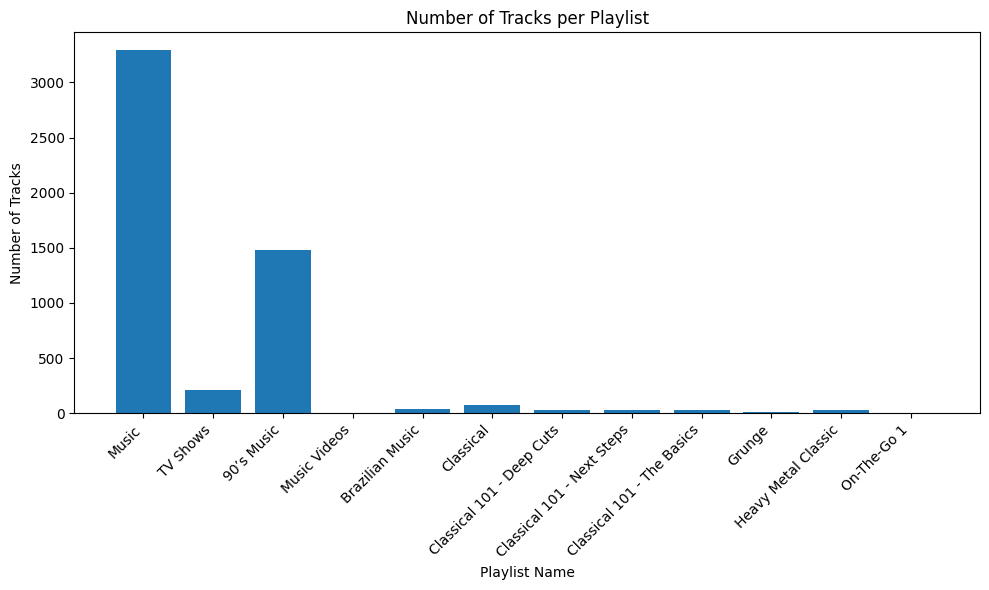

In [24]:
 # Connect to the database
conn = sqlite3.connect('chinook.db')
# SQL query to get data for the plot
sql = """
SELECT
    p.Name AS PlaylistName,
    COUNT(pt.TrackId) AS NumberOfTracks
FROM
    playlists AS p
JOIN
    playlist_track AS pt ON p.PlaylistId = pt.PlaylistId
GROUP BY
    p.PlaylistId;
"""
# Read the data directly into a pandas DataFrame
df = pd.read_sql_query(sql, conn)
# Close the connection
conn.close()
# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(df['PlaylistName'], df['NumberOfTracks'])
plt.xlabel("Playlist Name")
plt.ylabel("Number of Tracks")
plt.title("Number of Tracks per Playlist")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data
